# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [142]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib
plt.rcParams['figure.figsize'] = [8, 6]

### Step 1

Load an image (any image that contains faces).

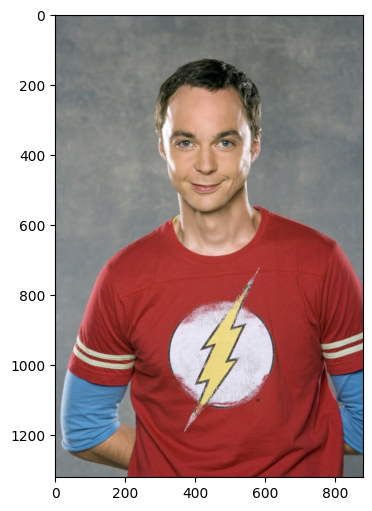

In [143]:
img = cv2.imread('1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [144]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [145]:
class FaceDetector:
    def __init__(self, img):
        self._img = img
    
    def _rects(self):
        assert False

    def _bb(self, rect):
        assert False
    
    def highlight(self):
        res = np.copy(self._img)
        for rect in self._rects():
            tl, br = self._bb(rect)
            cv2.rectangle(res, tl, br, (0, 255, 0), 3)
        return res
    

class DlibFaceDetector(FaceDetector):
    def _rects(self):
        return detector(cv2.cvtColor(self._img , cv2.COLOR_RGB2GRAY), 1)

    def _bb(self, rect):
        return (rect.left(), rect.top()), (rect.right(), rect.bottom())
    
    

class CVFaceDetector(FaceDetector):
    def __init__(self, img, cascade, scaleFactor=1.1, minNeighbors=5):
        super(CVFaceDetector, self).__init__(img)
        self._multiscaleRects = cv2.CascadeClassifier(cascade).detectMultiScale(cv2.cvtColor(
            img, cv2.COLOR_RGB2GRAY), scaleFactor=scaleFactor, minNeighbors=minNeighbors, flags=cv2.CASCADE_SCALE_IMAGE)

    def _rects(self):
        return self._multiscaleRects
    
    def _bb(self, rect):
        return (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3])

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<Axes: title={'center': 'cv2 frontalface'}>,
 Text(0.5, 1.0, 'cv2 frontalface'))

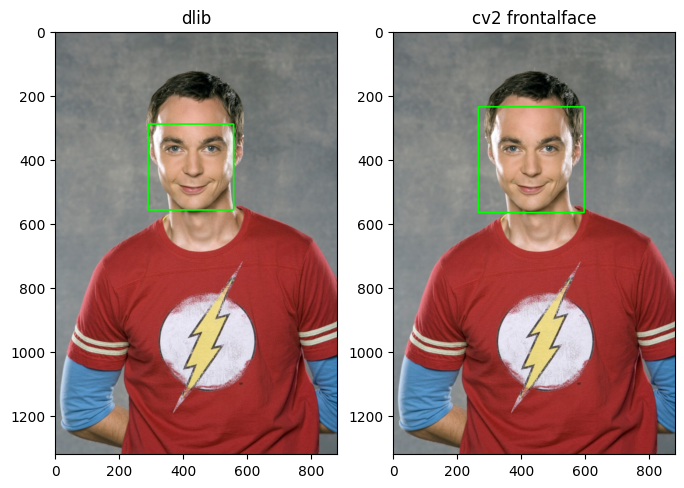

In [146]:
plt.subplot(121), plt.imshow(DlibFaceDetector(img).highlight()), plt.title('dlib')
plt.subplot(122), plt.imshow(CVFaceDetector(img, 'haarcascades/haarcascade_frontalface_default.xml', 1.1, 10).highlight()), plt.title('cv2 frontalface')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

(<matplotlib.image.AxesImage at 0x19e28cc06d0>, Text(0.5, 1.0, 'dlib'))

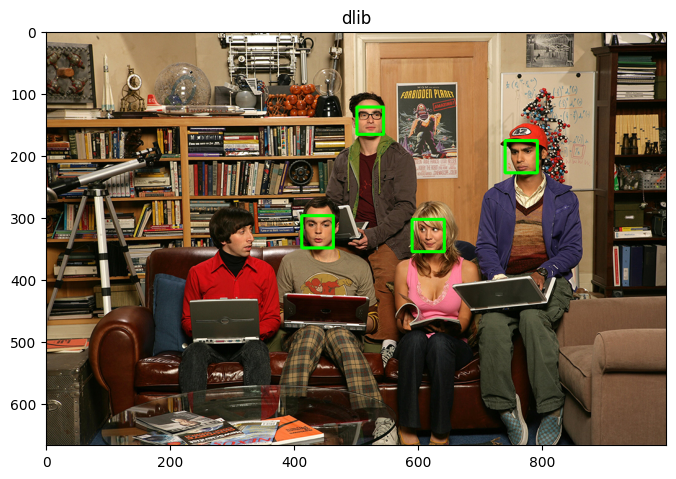

In [147]:
img2 = cv2.imread('2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(DlibFaceDetector(img2).highlight()), plt.title('dlib')

(<matplotlib.image.AxesImage at 0x19e28b11f40>,
 Text(0.5, 1.0, 'cv2 frontalface'))

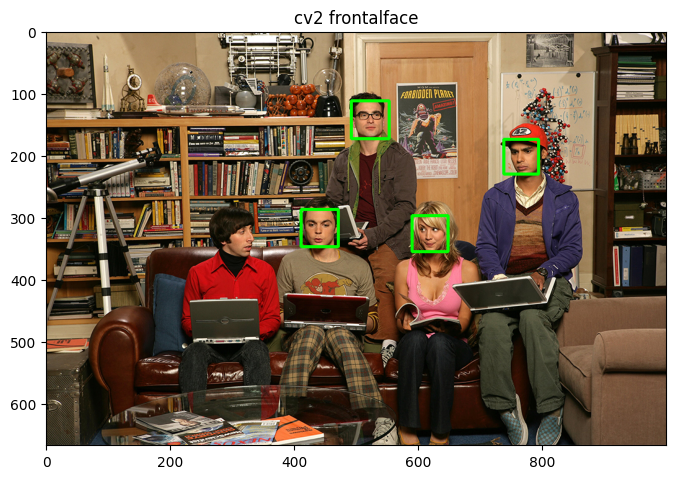

In [148]:
plt.imshow(CVFaceDetector(img2, 'haarcascades/haarcascade_frontalface_default.xml').highlight()), plt.title('cv2 frontalface')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


(<matplotlib.image.AxesImage at 0x19e305302b0>, Text(0.5, 1.0, 'MTCNN'))

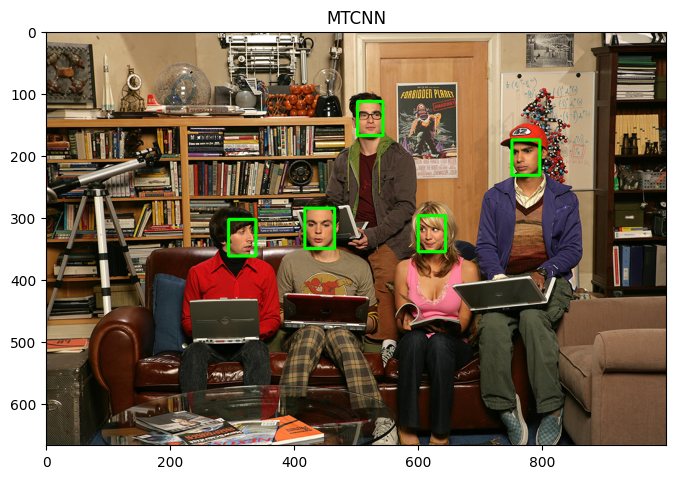

In [149]:
from mtcnn import MTCNN


class MTCNNFaceDetector(FaceDetector):
    def _rects(self):
        return MTCNN().detect_faces(self._img)
    
    def _bb(self, rect):
        bbox = rect['box']
        return (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3])


plt.imshow(MTCNNFaceDetector(img2).highlight()), plt.title('MTCNN')